In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

    # lets do 30,15 and 60

In [2]:
### read in features from previous stage
df30 = pd.read_csv("feats_orig.csv")
df15 = pd.read_csv("feats15.csv")
df60 = pd.read_csv("feats60.csv")
print(df30.shape)
print(df15.shape)
print(df60.shape)

(2518, 37)
(4927, 37)
(1309, 37)


In [3]:
df15["composer"] = df15["composer"].astype("category")
df15['composer'] = df15["composer"].cat.codes
df30["composer"] = df30["composer"].astype("category")
df30['composer'] = df30["composer"].cat.codes
df60["composer"] = df60["composer"].astype("category")
df60['composer'] = df60["composer"].cat.codes
print(df15["composer"].value_counts())
print(df30["composer"].value_counts())
print(df60["composer"].value_counts())
### 0 --> Bach
### 1 --> Beethoven
##  2 --> Brahms
##  3 --> Schubert

1    3308
3     737
2     640
0     242
Name: composer, dtype: int64
1    1692
3     374
2     326
0     126
Name: composer, dtype: int64
1    883
3    193
2    166
0     67
Name: composer, dtype: int64


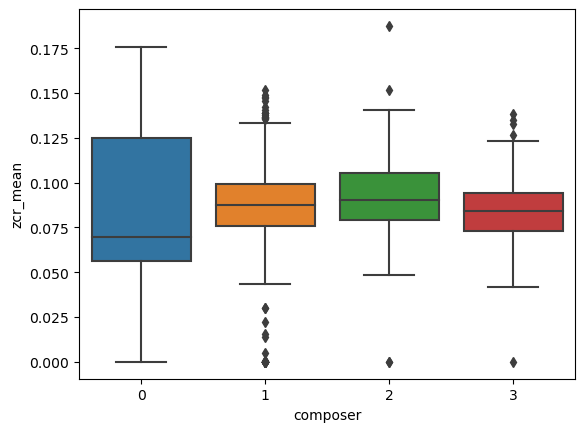

In [5]:
# lets take a look at some of the features for 30s only
sns.boxplot( x=df30["composer"], y=df30["zcr_mean"] );
plt.show()

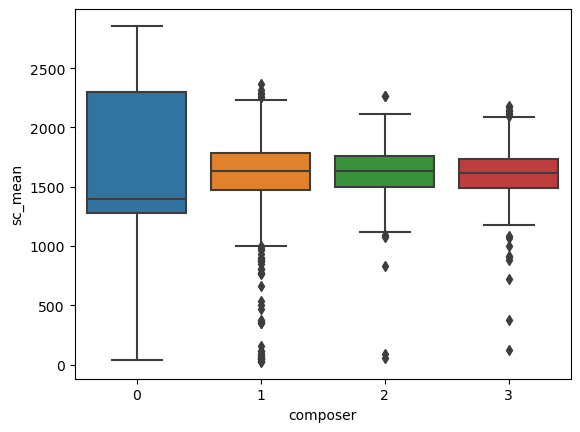

In [6]:
sns.boxplot( x=df30["composer"], y=df30["sc_mean"] );
plt.show()

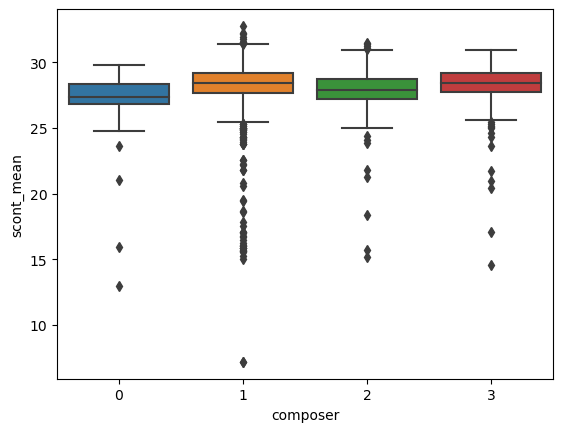

In [7]:
sns.boxplot( x=df30["composer"], y=df30["scont_mean"] );
plt.show()

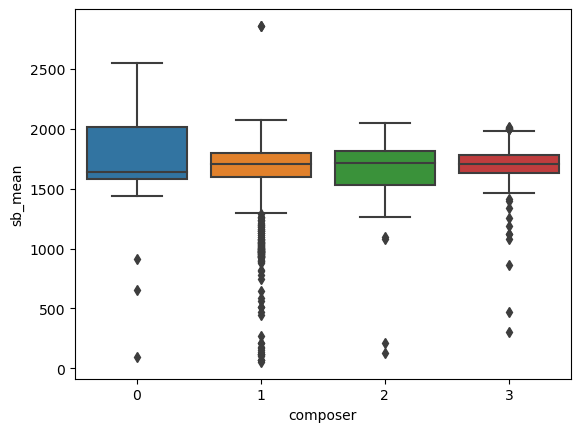

In [8]:
sns.boxplot( x=df30["composer"], y=df30["sb_mean"] );
plt.show()

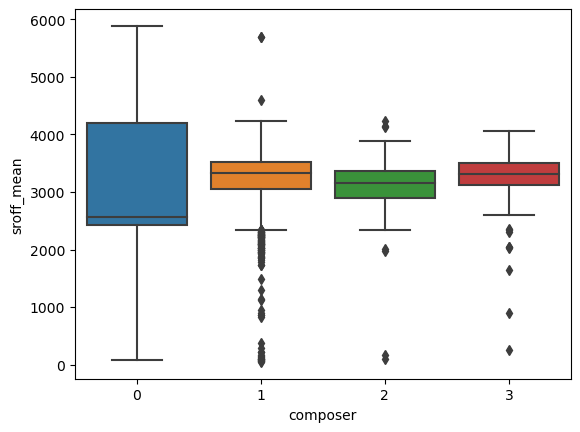

In [9]:
sns.boxplot( x=df30["composer"], y=df30["sroff_mean"] );
plt.show()

# lets do some Outlier removals

In [10]:
def find_limits(df, variable, fold):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_limit = df[variable].quantile(0.25) - (IQR * fold)
    upper_limit = df[variable].quantile(0.75) + (IQR * fold)

    return lower_limit, upper_limit

In [11]:
def clean_outliers(df):
    for column in df.columns:
        if column=="composer":
            pass
        else:
            lower_limit, upper_limit = find_limits(df, column, 3)
            inliers = df[column].ge(lower_limit)
            df = df.loc[inliers]
            inliers = df[column].le(upper_limit)
            df = df.loc[inliers]
            return df

In [12]:
print(df30.shape)
print(df15.shape)
print(df60.shape)

(2518, 37)
(4927, 37)
(1309, 37)


In [13]:
df30 = clean_outliers(df30)
print(df30.shape)
df15 = clean_outliers(df15)
print(df15.shape)
df60 = clean_outliers(df60)
print(df60.shape)

(2517, 37)
(4925, 37)
(1295, 37)


In [14]:
print(df30.shape)
print(df30["composer"].value_counts())
print(df60.shape)
print(df60["composer"].value_counts())
print(df15.shape)
print(df15["composer"].value_counts())

(2517, 37)
1    1692
3     374
2     325
0     126
Name: composer, dtype: int64
(1295, 37)
1    874
3    192
2    165
0     64
Name: composer, dtype: int64
(4925, 37)
1    3308
3     737
2     639
0     241
Name: composer, dtype: int64


In [16]:
### lets rescale inputs

y30 = df30['composer']
X30 = df30.loc[:, df30.columns != 'composer']

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X30)
X30 = pd.DataFrame(np_scaled, columns = X30.columns)
print(X30.shape, y30.shape)

(2517, 36) (2517,)


In [17]:
### lets rescale inputs

y60 = df60['composer']
X60 = df60.loc[:, df60.columns != 'composer']

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X60)
X60 = pd.DataFrame(np_scaled, columns = X60.columns)
print(X60.shape, y60.shape)

(1295, 36) (1295,)


In [18]:
### lets rescale inputs

y15 = df15['composer']
X15 = df15.loc[:, df15.columns != 'composer']

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X15)
X15 = pd.DataFrame(np_scaled, columns = X15.columns)
print(X15.shape, y15.shape)

(4925, 36) (4925,)


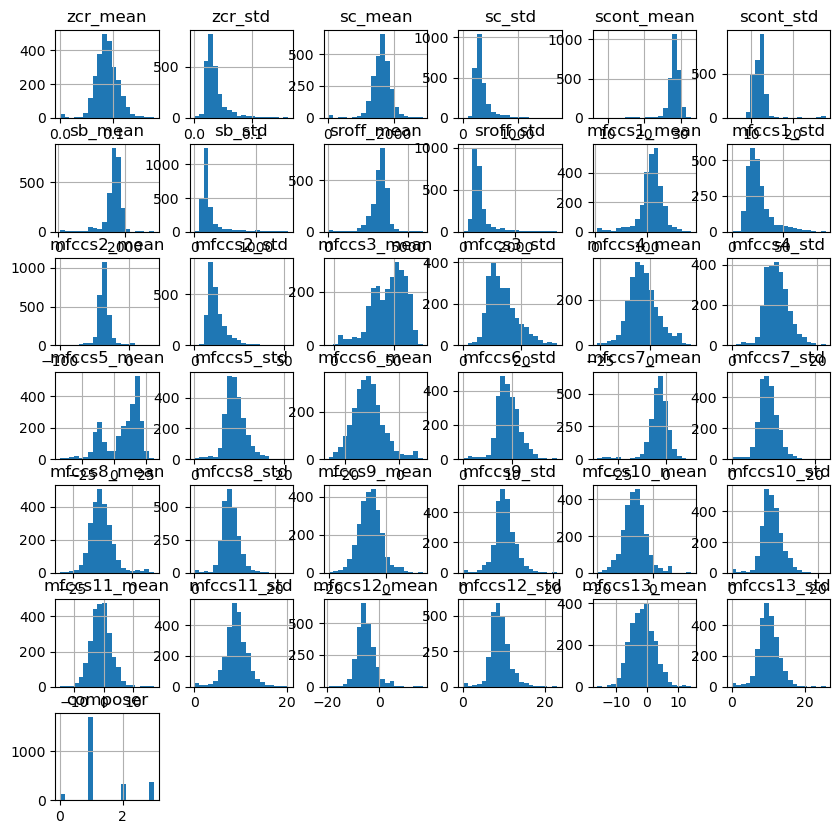

In [19]:
#check distribution before scaling
df30.hist(bins=20, figsize=(10,10))
plt.show()

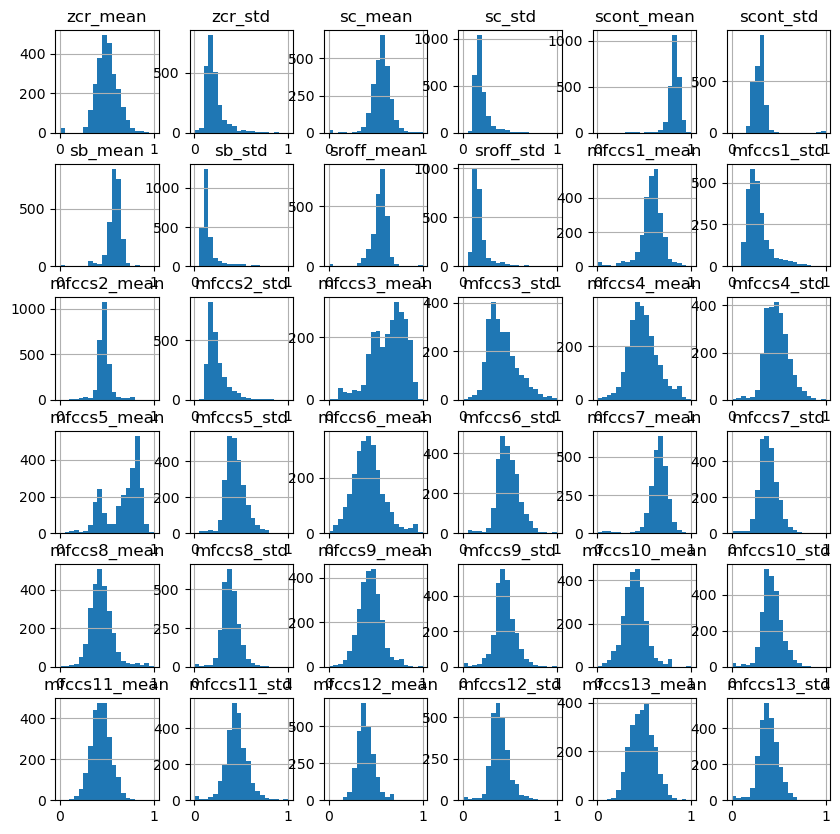

In [20]:
# distribution after scaling
## just checking... to see before and after
X30.hist(bins=20, figsize=(10,10))
plt.show()

In [21]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0,sampling_strategy="majority"
)
X30_res, y30_res = rus.fit_resample(X30, y30)
X60_res, y60_res = rus.fit_resample(X60, y60)
X15_res, y15_res = rus.fit_resample(X15, y15)

In [26]:
print(y30_res.value_counts())
print(y60_res.value_counts())
print(y15_res.value_counts())

3    374
2    325
0    126
1    126
Name: composer, dtype: int64
3    192
2    165
0     64
1     64
Name: composer, dtype: int64
3    737
2    639
0    241
1    241
Name: composer, dtype: int64


In [131]:
X30_train, X30_test, y30_train, y30_test = train_test_split(
    X30_res,
    y30_res,
    test_size=0.3,
    random_state=0,
)

In [132]:
print(X30_train.shape)
print(X30_test.shape)
print(y30_train.shape)
print(y30_test.shape)

(665, 36)
(286, 36)
(665,)
(286,)


In [133]:
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model.fit(X30_train, y30_train)
preds30 = model.predict(X30_test)

print(confusion_matrix(y30_test, preds30))


[[35  0  0  0]
 [ 0  4 17 10]
 [ 1  1 98  7]
 [ 0  5 13 95]]


In [134]:
print(f1_score(y30_test,preds30,average='micro'))

0.8111888111888111


In [135]:
df_target = pd.read_csv("target_feats_orig.csv")

In [136]:
columns_frame = ['zcr_mean', 
         'zcr_std',
        'sc_mean',
         'sc_std',
         'scont_mean',
         'scont_std',
         'sb_mean',
         'sb_std',
         'sroff_mean',
         'sroff_std',
         'mfccs1_mean',
         'mfccs1_std',
         'mfccs2_mean',
         'mfccs2_std',
         'mfccs3_mean',
         'mfccs3_std',
         'mfccs4_mean',
         'mfccs4_std',
         'mfccs5_mean',
         'mfccs5_std',
         'mfccs6_mean',
         'mfccs6_std',
         'mfccs7_mean',
         'mfccs7_std',
         'mfccs8_mean',
         'mfccs8_std',
         'mfccs9_mean',
         'mfccs9_std',
         'mfccs10_mean',
         'mfccs10_std',
         'mfccs11_mean',
         'mfccs11_std',
         'mfccs12_mean',
         'mfccs12_std',
         'mfccs13_mean',
         'mfccs13_std'
    ]

In [141]:
grouped = df_target.groupby(["composer"])
i=0
final_result = set()
for name, group in grouped:
    df_pred = group[columns_frame]
    prediction_probs = model.predict_proba(df_pred)
    if(prediction_probs>0.50).any():
        pass
    else:
        final_result.add(name.split("_adj")[0]+"_adj.mid")
        
print(len(final_result))
for f in final_result:
    print(f)

/var/folders/08/dpzlrd_n27zb6zw32lf533640000gn/T/ipykernel_15484/305232150.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


35
0.23120017256495873_adj.mid
0.3334293069825759_adj.mid
0.1960551158929671_adj.mid
0.30993012400290976_adj.mid
0.9353908329958764_adj.mid
0.647959423719129_adj.mid
0.48367685897240176_adj.mid
0.3264565808984162_adj.mid
0.06402123326764841_adj.mid
0.21198476749665085_adj.mid
0.3620067189216978_adj.mid
0.09167358800381353_adj.mid
0.7491289879531658_adj.mid
0.3559970176888735_adj.mid
0.549470161204349_adj.mid
0.10250888365879718_adj.mid
0.36321860283443286_adj.mid
0.047574444458241216_adj.mid
0.21901852969811753_adj.mid
0.905499891236923_adj.mid
0.9511403301279795_adj.mid
0.07186746659481313_adj.mid
0.22047111832936942_adj.mid
0.539512676743813_adj.mid
0.033313986422223163_adj.mid
0.981087291054314_adj.mid
0.10222964826466285_adj.mid
0.337517805339117_adj.mid
0.1755252422917658_adj.mid
0.5807329043589801_adj.mid
0.26551079719260606_adj.mid
0.33695573887576447_adj.mid
0.002716920481628_adj.mid
0.10630249969742178_adj.mid
0.8014751784512073_adj.mid


# lets do 60

In [147]:
X60_train, X60_test, y60_train, y60_test = train_test_split(
    X60_res,
    y60_res,
    test_size=0.3,
    random_state=0,
)

In [148]:
model = RandomForestClassifier(n_estimators=3000, max_depth=20, random_state=0)
model.fit(X60_train, y60_train)
preds60 = model.predict(X60_test)

print(confusion_matrix(y60_test, preds60))


[[22  0  0  1]
 [ 1  3  4  8]
 [ 1  1 43  3]
 [ 1  4  9 45]]


In [149]:
print(f1_score(y60_test,preds60,average='micro'))

0.773972602739726


In [150]:
df_target = pd.read_csv("target_feats60.csv")

In [153]:
grouped = df_target.groupby(["composer"])
i=0
final_result = set()
for name, group in grouped:
    df_pred = group[columns_frame]
    prediction_probs = model.predict_proba(df_pred)
    if(prediction_probs>0.5).any():
        pass
    else:
        final_result.add(name.split("_adj")[0]+"_adj.mid")
        #print(prediction_probs)
        
print(len(final_result))
for f in final_result:
    print(f)

/var/folders/08/dpzlrd_n27zb6zw32lf533640000gn/T/ipykernel_15484/3384911759.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


35
0.23120017256495873_adj.mid
0.3334293069825759_adj.mid
0.1960551158929671_adj.mid
0.30993012400290976_adj.mid
0.9353908329958764_adj.mid
0.647959423719129_adj.mid
0.48367685897240176_adj.mid
0.3264565808984162_adj.mid
0.06402123326764841_adj.mid
0.21198476749665085_adj.mid
0.3620067189216978_adj.mid
0.09167358800381353_adj.mid
0.7491289879531658_adj.mid
0.3559970176888735_adj.mid
0.549470161204349_adj.mid
0.10250888365879718_adj.mid
0.36321860283443286_adj.mid
0.047574444458241216_adj.mid
0.21901852969811753_adj.mid
0.905499891236923_adj.mid
0.9511403301279795_adj.mid
0.07186746659481313_adj.mid
0.22047111832936942_adj.mid
0.539512676743813_adj.mid
0.033313986422223163_adj.mid
0.981087291054314_adj.mid
0.10222964826466285_adj.mid
0.337517805339117_adj.mid
0.1755252422917658_adj.mid
0.5807329043589801_adj.mid
0.26551079719260606_adj.mid
0.33695573887576447_adj.mid
0.002716920481628_adj.mid
0.10630249969742178_adj.mid
0.8014751784512073_adj.mid


# lets do 15

In [155]:
X15_train, X15_test, y15_train, y15_test = train_test_split(
    X15_res,
    y15_res,
    test_size=0.3,
    random_state=0,
)

In [158]:
model = RandomForestClassifier(n_estimators=3000, max_depth=20, random_state=0)
model.fit(X15_train, y15_train)
preds15 = model.predict(X15_test)

print(confusion_matrix(y15_test, preds15))

[[ 70   0   8   5]
 [  1   9  17  43]
 [  0   0 171  15]
 [  0   0  26 193]]


In [159]:
print(f1_score(y15_test,preds15,average='micro'))

0.7939068100358423


In [160]:
df_target = pd.read_csv("target_feats15.csv")

In [161]:
grouped = df_target.groupby(["composer"])
i=0
final_result = set()
for name, group in grouped:
    df_pred = group[columns_frame]
    prediction_probs = model.predict_proba(df_pred)
    if(prediction_probs>0.50).any():
        pass
    else:
        #print(name)
        final_result.add(name.split("_adj")[0]+"_adj.mid")
        #print(prediction_probs)
        
print(len(final_result))
for f in final_result:
    print(f)

/var/folders/08/dpzlrd_n27zb6zw32lf533640000gn/T/ipykernel_15484/4264984422.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in grouped:


35
0.23120017256495873_adj.mid
0.3334293069825759_adj.mid
0.1960551158929671_adj.mid
0.30993012400290976_adj.mid
0.9353908329958764_adj.mid
0.647959423719129_adj.mid
0.48367685897240176_adj.mid
0.3264565808984162_adj.mid
0.06402123326764841_adj.mid
0.21198476749665085_adj.mid
0.3620067189216978_adj.mid
0.09167358800381353_adj.mid
0.7491289879531658_adj.mid
0.3559970176888735_adj.mid
0.549470161204349_adj.mid
0.10250888365879718_adj.mid
0.36321860283443286_adj.mid
0.047574444458241216_adj.mid
0.21901852969811753_adj.mid
0.905499891236923_adj.mid
0.9511403301279795_adj.mid
0.07186746659481313_adj.mid
0.22047111832936942_adj.mid
0.539512676743813_adj.mid
0.033313986422223163_adj.mid
0.981087291054314_adj.mid
0.10222964826466285_adj.mid
0.337517805339117_adj.mid
0.1755252422917658_adj.mid
0.5807329043589801_adj.mid
0.26551079719260606_adj.mid
0.33695573887576447_adj.mid
0.002716920481628_adj.mid
0.10630249969742178_adj.mid
0.8014751784512073_adj.mid
